In [1]:
import json
from matplotlib import pyplot as plt

In [2]:
subjects = json.load(open('../../data/json/depositonce/subjects.json'))  # dict of subjects (keys) and the list of publications they appear in (values).
counts = {subject: len(subjects[subject]) for subject in subjects}  # same as subjects, but the length of the list as values.
sorted_counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}

In [3]:
subject_sizes = dict()
for subject, cnt in counts.items():
    if cnt not in subject_sizes:
        subject_sizes[cnt] = 0
    subject_sizes[cnt] += 1
sorted_sizes = sorted(subject_sizes.items())

In [4]:
print(f'In total, there are {len(counts)} subjects in the repository.')
print(f'{sorted_sizes[0][1]} of them appear only once in the repository, i.e. only one publication mentions it.')

In total, there are 53366 subjects in the repository.
42010 of them appear only once in the repository, i.e. only one publication mentions it.


In [5]:
print('These are the three most popular subjects:')
n = 0
for subject, cnt in sorted_counts.items():
    print(f'"{subject}" appears in {cnt} publications')
    n += 1
    if n == 3: break

These are the three most popular subjects:
"620 Ingenieurwissenschaften und zugeordnete Tätigkeiten" appears in 2021 publications
"530 Physik" appears in 1028 publications
"540 Chemie und zugeordnete Wissenschaften" appears in 1005 publications


These subjects (which are the only ones that appear in more than 1,000 publications) are very general and wouldn't be of use for a recommender system.

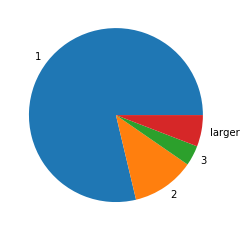

In [6]:
subject_size, subject_count = zip(*sorted_sizes)
grouped_sizes = sorted_sizes[:3] + [('larger', sum([tup[1] for tup in sorted_sizes[3:]]))]
plt.pie([t[1] for t in grouped_sizes], labels=[t[0] for t in grouped_sizes])
plt.show()

This pie chart shows how often subjects occur. The wedge with value 1 represents how many subjects occur only once in the repository. More than three quarters of the subjects occur only once.